In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

train_data = pd.read_csv("../data/train.csv", index_col='Id')
test_data= pd.read_csv("../data/test.csv", index_col='Id')

In [14]:
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True) # droping the NaN values form SalePrice
y=train_data.SalePrice # selecting the target
train_data.drop(['SalePrice'], axis=1, inplace=True)

num_cols = [cols for cols in train_data.columns if train_data[cols].dtype in ['int64','float64']]
X = train_data[num_cols].copy()
X_test = test_data[num_cols].copy()

In [15]:
my_pipeline = Pipeline(steps=[    # Created a pipeline that deals with the NaN in numbers
    ('imputer', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=200, random_state=0))
])
score = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print(score.mean())  

17937.141941780825


# Finetuning n_estimators

In [16]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[    
    ('imputer', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators, random_state=0))
])
    score = -1 * cross_val_score(my_pipeline,X,y,cv=5,scoring='neg_mean_absolute_error')
    return score.mean()

In [17]:
result = {}
for i in range(1,9):
    result[50*i] = get_score(50*i)

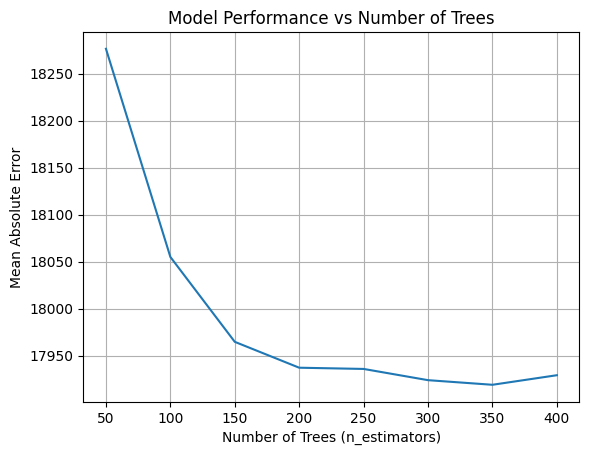

Best n_estimators : 350


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(result.keys()), list(result.values()))
plt.title("Model Performance vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Absolute Error")
plt.grid(True)
plt.show()
best_n = min(result, key=result.get)
print(f"Best n_estimators : {best_n}")

In [25]:
my_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=best_n, random_state=0))
])
score = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print(score.mean())

17918.986291026


In [22]:
my_pipeline.fit(X,y)
predictions = my_pipeline.predict(X_test)
print(predictions)
'''
# storing the output in a csv file
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': predictions})
#output['SalePrice'] = output['SalePrice'].map(lambda x: f"{x:.2f}")
output.to_csv('submission.csv', index=False)'''


[127164.52       157196.42857143 183217.81142857 ... 161608.03428571
 110320.40857143 233997.2       ]


'\n# storing the output in a csv file\noutput = pd.DataFrame({\'Id\': test_data.index, \'SalePrice\': predictions})\n#output[\'SalePrice\'] = output[\'SalePrice\'].map(lambda x: f"{x:.2f}")\noutput.to_csv(\'submission.csv\', index=False)'